In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [2]:
airline = pd.read_excel("C:\\Users\\User\\Downloads\\Airlines+Data.xlsx")

In [3]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airline['Month'] = pd.to_datetime(airline['Month'],infer_datetime_format=True)
indexedDataset = airline.set_index(['Month'])
indexedDataset.head(10)

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


#### In this graph trend is increasing therefore the rollong mean also get increase

Text(0, 0.5, 'Number of Passengers')

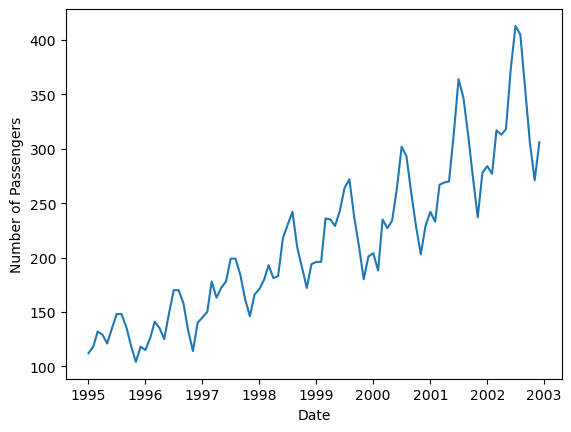

In [5]:
plt.plot(indexedDataset)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

In [6]:
rollmean = indexedDataset.rolling(window = 12).mean()
rollstd = indexedDataset.rolling(window = 12).std()
print(rollmean,rollstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


Text(0.5, 1.0, 'rollng mean & standard deviation')

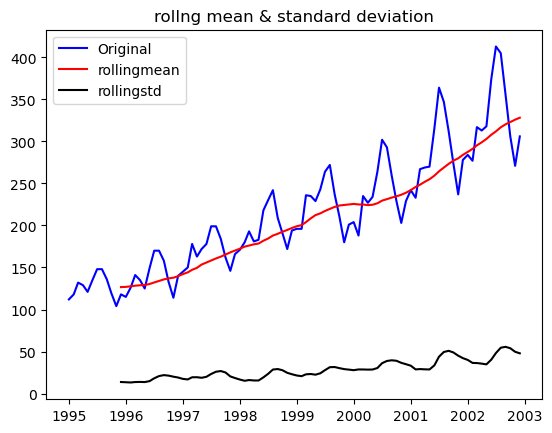

In [7]:
#plot rolling statistics
org = plt.plot(indexedDataset, color = 'blue', label ='Original')
mean = plt.plot(rollmean, color = 'red', label ='rollingmean')
std = plt.plot(rollstd, color = 'black', label ='rollingstd')
plt.legend(loc = 'best')
plt.title ('rollng mean & standard deviation')

In [8]:
from statsmodels.tsa.stattools import adfuller
#Perform Augmented Dickey-Fuller Test:
print("Result of Dickey-Fuller Test::")
dftest = adfuller(indexedDataset['Passengers'],autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#lag Used', 'Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Result of Dickey-Fuller Test::
Test Statistics                1.340248
p-value                        0.996825
#lag Used                     12.000000
Number of Observation Used    83.000000
Critical Value (1%)           -3.511712
Critical Value (5%)           -2.897048
Critical Value (10%)          -2.585713
dtype: float64


## Tranformations
#### logScale tranformation

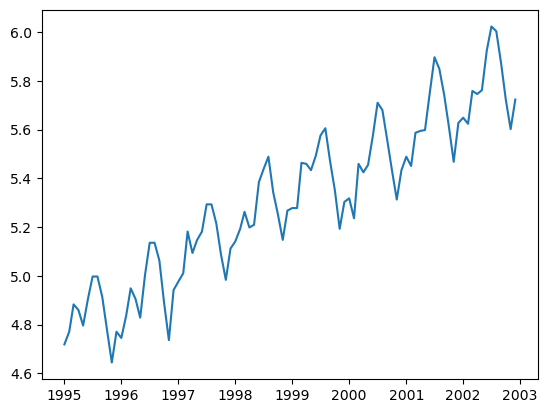

In [9]:
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

In [10]:
indexedDataset_logscale

,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791
...,...
2002-08-01,6.003887
2002-09-01,5.872118
2002-10-01,5.723585


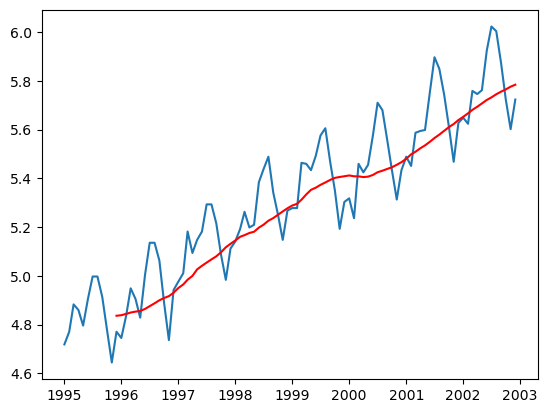

In [11]:
movingaverage = indexedDataset_logscale.rolling(window = 12).mean() 
movingstd = indexedDataset_logscale.rolling(window = 12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage,color='red')


In [12]:
datasetlogScaleMinusMovingAverage = indexedDataset_logscale - movingaverage
datasetlogScaleMinusMovingAverage.head(12)

datasetlogScaleMinusMovingAverage.dropna(inplace=True)
datasetlogScaleMinusMovingAverage.head(12)

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
1996-05-01,-0.027529
1996-06-01,0.139881
1996-07-01,0.260184
1996-08-01,0.248635


In [13]:
def text_stationarity(test_stationarity):
    
    rollmean = test_stationarity.rolling(window = 12).mean()
    rollstd = test_stationarity.rolling(window = 12).std()
    
    #plot rolling statistics
    org = plt.plot(test_stationarity, color = 'blue', label ='Original')
    mean = plt.plot(rollmean, color = 'red', label ='rollingmean')
    std = plt.plot(rollstd, color = 'black', label ='rollingstd')
    plt.legend(loc = 'best')
    plt.title ('rollng mean & standard deviation')
    
    print("Result of Dickey-Fuller Test::")
    dftest = adfuller(test_stationarity['Passengers'],autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#lag Used', 'Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
        
    

Result of Dickey-Fuller Test::
Test Statistics               -1.910930
p-value                        0.326937
#lag Used                     12.000000
Number of Observation Used    72.000000
Critical Value (1%)           -3.524624
Critical Value (5%)           -2.902607
Critical Value (10%)          -2.588679
dtype: float64


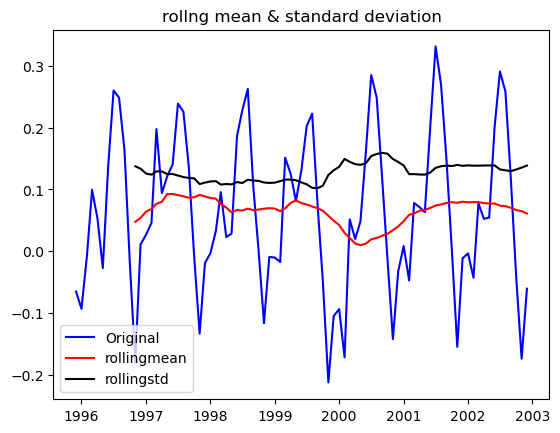

In [14]:
text_stationarity(datasetlogScaleMinusMovingAverage)

### Exponential Decay Transformation

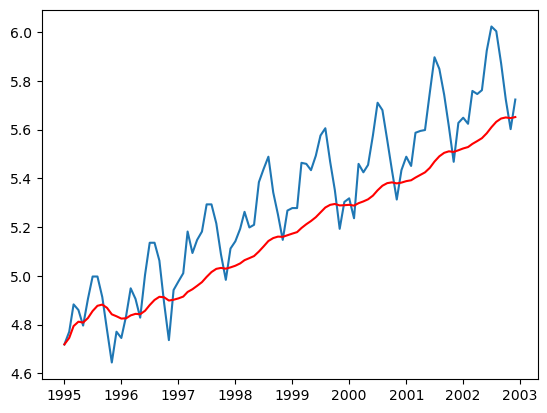

In [15]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12,adjust = True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

Result of Dickey-Fuller Test::
Test Statistics               -2.835036
p-value                        0.053441
#lag Used                     12.000000
Number of Observation Used    83.000000
Critical Value (1%)           -3.511712
Critical Value (5%)           -2.897048
Critical Value (10%)          -2.585713
dtype: float64


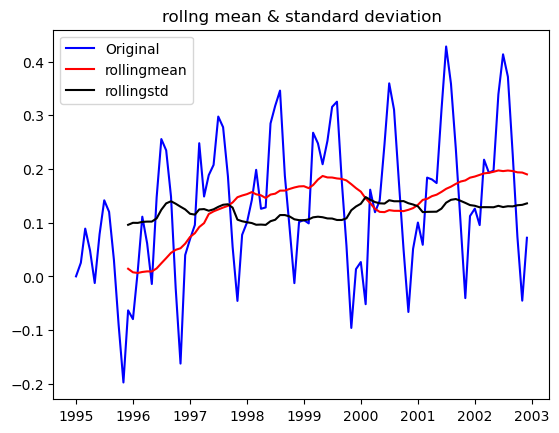

In [16]:
datsetlogScaleMinusexpoenetialMovingAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
text_stationarity(datsetlogScaleMinusexpoenetialMovingAverage)

### Time Shift

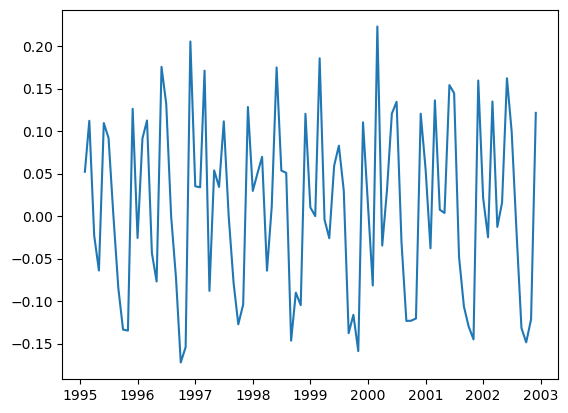

In [17]:
datasetlogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetlogDiffShifting)

Result of Dickey-Fuller Test::
Test Statistics               -2.670823
p-value                        0.079225
#lag Used                     12.000000
Number of Observation Used    82.000000
Critical Value (1%)           -3.512738
Critical Value (5%)           -2.897490
Critical Value (10%)          -2.585949
dtype: float64


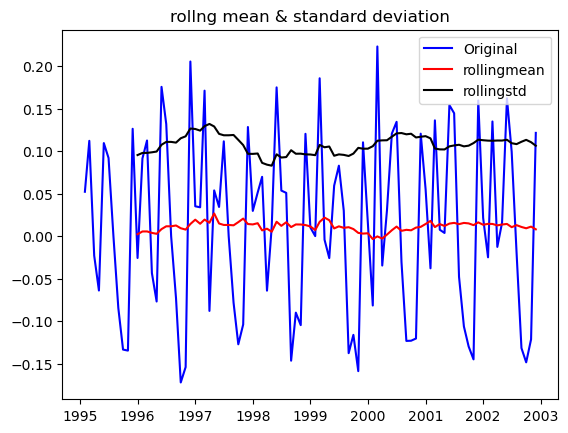

In [18]:
datasetlogDiffShifting.dropna(inplace=True)
text_stationarity(datasetlogDiffShifting)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

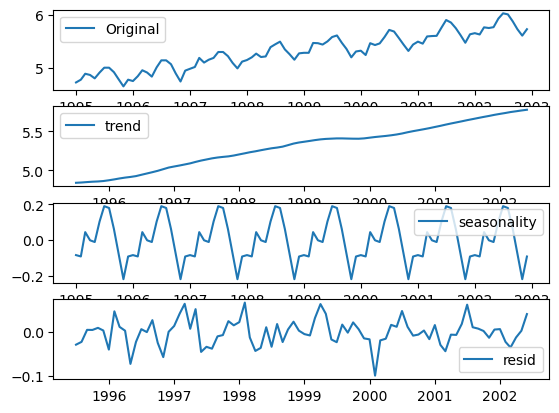

In [19]:
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'resid')
plt.legend(loc = 'best')

plt.tight_layout

In [20]:
def text_stationarity(test_stationarity):
    
    rollmean = test_stationarity.rolling(window = 12).mean()
    rollstd = test_stationarity.rolling(window = 12).std()
    
    #plot rolling statistics
    org = plt.plot(test_stationarity, color = 'blue', label ='Original')
    mean = plt.plot(rollmean, color = 'red', label ='rollingmean')
    std = plt.plot(rollstd, color = 'black', label ='rollingstd')
    plt.legend(loc = 'best')
    plt.title ('rollng mean & standard deviation')
    
    print("Result of Dickey-Fuller Test::")
    dftest = adfuller(test_stationarity,autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#lag Used', 'Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Result of Dickey-Fuller Test::
Test Statistics              -5.907863e+00
p-value                       2.681970e-07
#lag Used                     3.000000e+00
Number of Observation Used    8.000000e+01
Critical Value (1%)          -3.514869e+00
Critical Value (5%)          -2.898409e+00
Critical Value (10%)         -2.586439e+00
dtype: float64


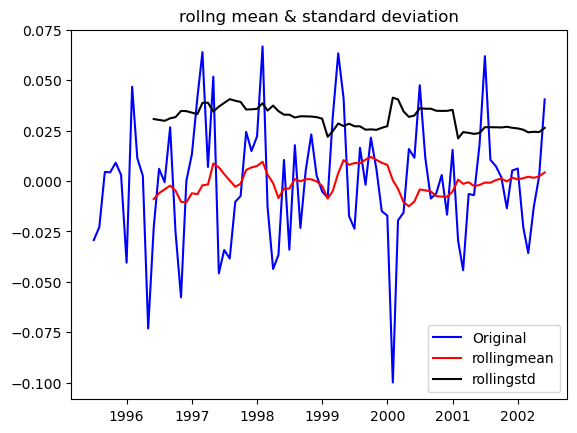

In [21]:
decomposedlogData = residual
decomposedlogData.dropna(inplace=True)
text_stationarity(decomposedlogData)

In [22]:
lag_acf = acf(datasetlogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetlogDiffShifting, nlags = 20 , method='ols')

In [23]:
np.round(lag_acf,2)

array([ 1.  ,  0.16, -0.16, -0.14, -0.31, -0.06,  0.12, -0.11, -0.32,
       -0.09, -0.14,  0.17,  0.79,  0.16, -0.18, -0.09, -0.27, -0.01,
        0.07, -0.1 , -0.3 ])

In [24]:
np.round(lag_pacf,2)

array([ 1.  ,  0.16, -0.2 , -0.09, -0.36, -0.  , -0.  , -0.24, -0.51,
       -0.24, -0.6 , -0.54,  0.54,  0.27, -0.12,  0.19, -0.06, -0.01,
       -0.15,  0.06, -0.18])

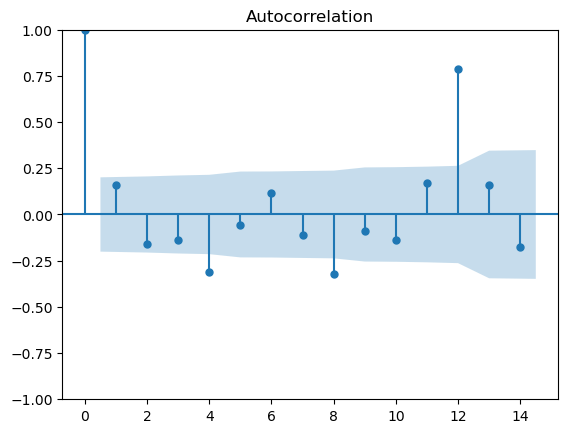

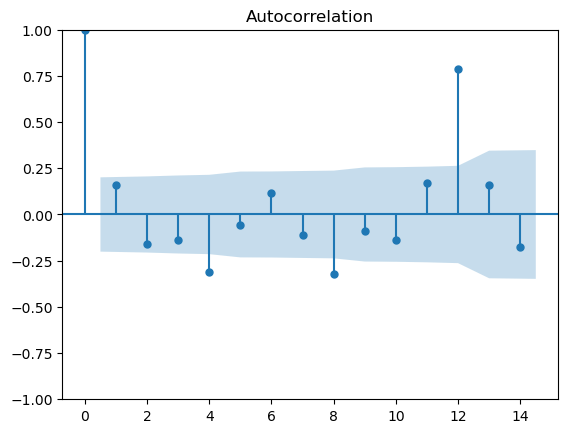

In [25]:
plot_acf(datasetlogDiffShifting,lags=14)

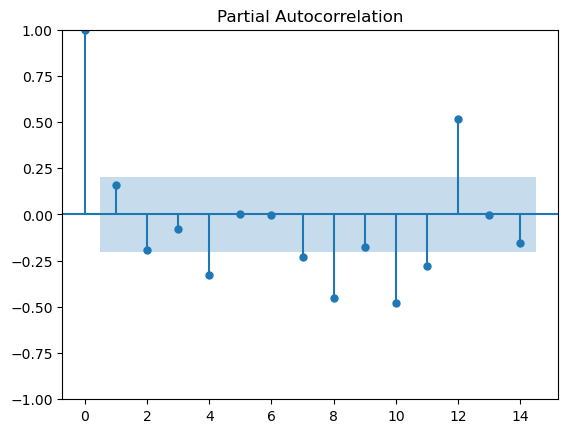

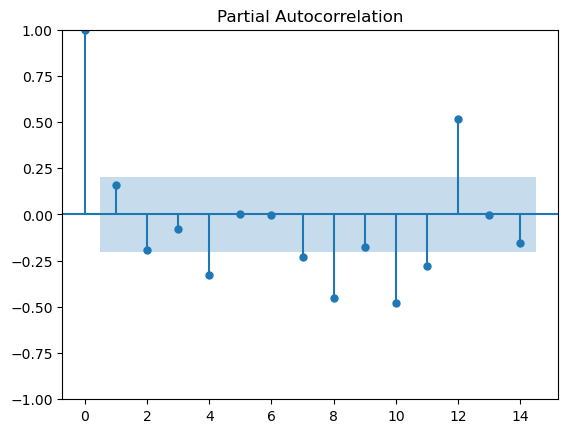

In [26]:
plot_pacf(datasetlogDiffShifting,lags=14)

## BUILDING MODELS
### ARIMA 

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [28]:
model_ar = ARIMA(datasetlogDiffShifting, order=(2,1,0))
model_ar_fit = model_ar.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


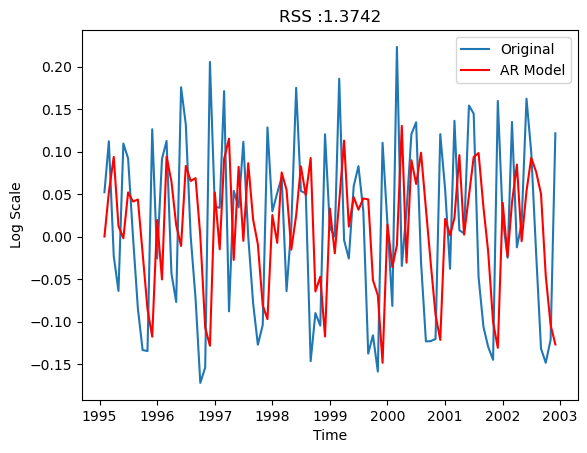

In [29]:
plt.plot(datasetlogDiffShifting, label='Original')
plt.plot(model_ar_fit.fittedvalues, color='red', label='AR Model')
plt.title('RSS :%.4f'%sum((model_ar_fit.fittedvalues - datasetlogDiffShifting['Passengers'])**2))
plt.xlabel('Time')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


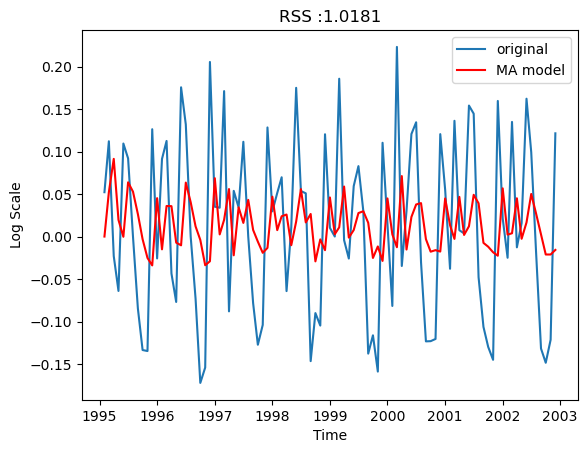

In [30]:
#MA models
model_ma = ARIMA(datasetlogDiffShifting,order=(0,1,2))
result_ma = model_ma.fit()
plt.plot(datasetlogDiffShifting , label='original')
plt.plot(result_ma.fittedvalues,color = 'red' , label='MA model')
plt.title('RSS :%.4f'%sum((result_ma.fittedvalues - datasetlogDiffShifting['Passengers'])**2))
plt.xlabel('Time')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


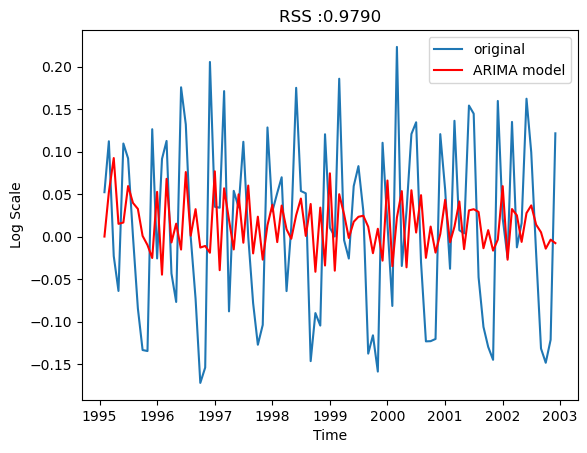

In [31]:
#AR+I+MA models
model_arima = ARIMA(datasetlogDiffShifting,order=(2,1,2))
result_arima = model_arima.fit()
plt.plot(datasetlogDiffShifting , label='original')
plt.plot(result_arima.fittedvalues,color = 'red' , label='ARIMA model')
plt.title('RSS :%.4f'%sum((result_arima.fittedvalues - datasetlogDiffShifting['Passengers'])**2))
plt.xlabel('Time')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

In [32]:
#pred_arima_diff = result_arima.predict(start=len(datasetlogDiffShifting), end=len(datasetlogDiffShifting) + n - 1)

In [33]:
pred_arima_diff = pd.Series(result_arima.fittedvalues , copy = True)
print(pred_arima_diff.head(10))

Month
1995-02-01    0.000000
1995-03-01    0.052186
1995-04-01    0.092364
1995-05-01    0.014939
1995-06-01    0.016502
1995-07-01    0.059437
1995-08-01    0.039544
1995-09-01    0.032554
1995-10-01    0.000786
1995-11-01   -0.010015
dtype: float64


In [34]:
pred_arima_diff_cumsum = pred_arima_diff.cumsum()
print(pred_arima_diff_cumsum)

Month
1995-02-01    0.000000
1995-03-01    0.052186
1995-04-01    0.144550
1995-05-01    0.159489
1995-06-01    0.175991
                ...   
2002-08-01    1.336121
2002-09-01    1.341167
2002-10-01    1.326936
2002-11-01    1.323264
2002-12-01    1.315523
Length: 95, dtype: float64


In [35]:
pred_arima_log = pd.Series(indexedDataset_logscale['Passengers'].iloc[0], index=indexedDataset_logscale.index)
pred_arima_log = pred_arima_log.add(pred_arima_diff_cumsum, fill_value=0)
pred_arima_log.head(10)

Month
1995-01-01    4.718499
1995-02-01    4.718499
1995-03-01    4.770685
1995-04-01    4.863049
1995-05-01    4.877988
1995-06-01    4.894490
1995-07-01    4.953927
1995-08-01    4.993471
1995-09-01    5.026025
1995-10-01    5.026811
dtype: float64

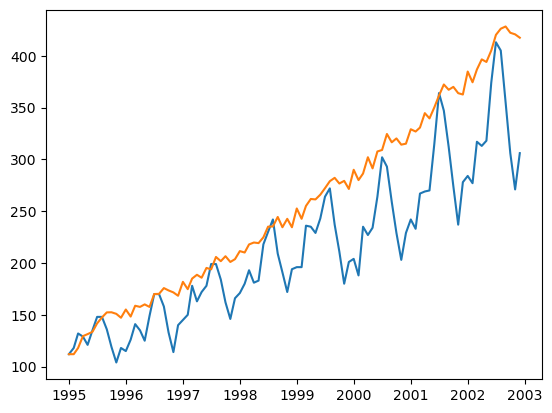

In [36]:
# inverse of lg is exp 
predictions_Arima = np.exp(pred_arima_log)
plt.plot(indexedDataset)
plt.plot(predictions_Arima)

In [37]:
indexedDataset_logscale

,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791
...,...
2002-08-01,6.003887
2002-09-01,5.872118
2002-10-01,5.723585


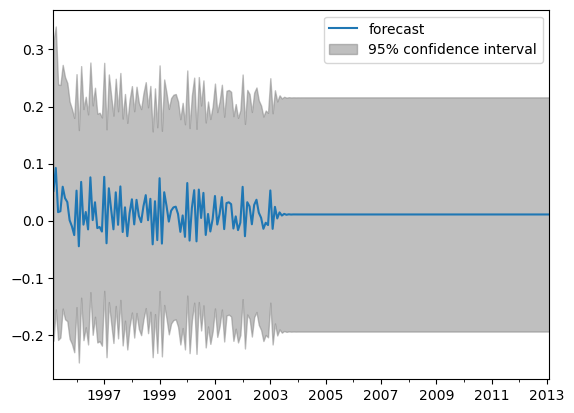

In [39]:
plot_predict(result_arima ,start=1,
    end=216,)
plt.show()